##### House Price Prediction Case Study
##### Author - Ravi Kumar Dhiman

##### Background:
* A US-based housing company named Surprise Housing has decided to enter the Australian market.
* The company is looking at prospective properties to buy to enter the market.

##### Company Info
* The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
* The company has collected a data set from the sale of houses in Australia.

##### High Level Requirements
* Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
* The company wants to know the following -
    1. Which variables are significant in predicting the price of a house, and
    2. How well those variables describe the price of a house
    3. Determine the optimal value of lambda for ridge and lasso regression

##### Business Goal (Objectives)
* Create a model for the price of houses with the available independent variables.

##### Why is this needed ?
* It will be used by the management to understand how exactly the prices vary with the variables.
    * The model will be a good way for management to understand the pricing dynamics of a new market.
* The Management can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns

In [538]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1 - Read and Understand the data

In [539]:
# reading the dataset
df = pd.read_csv("train.csv", encoding = 'utf-8')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [540]:
# Check the dimensions
df.shape

(1460, 81)

In [541]:
# Check for column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [542]:
# To get the description of the dataset
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [543]:
# Check for duplicate id's
sum(df.duplicated(subset=['Id'])) == 0

True

In [544]:
# Since there are no duplicated id's, dropping the id column as it's not needed and will not impact the analysis
df.drop(['Id'], axis = 1, inplace = True)

# Let's look for nulls/missing values in all columns
def findMissingValuesPercentagePerColumn():
    return round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

findMissingValuesPercentagePerColumn()

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtCond          2.53
BsmtQual          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
MSSubClass        0.00
Fireplaces        0.00
Functional        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [545]:
# PoolQC, MiscFeature, Alley, Fence have > 80% null values.
# Removing these columns would be beneficial
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1, inplace = True)

df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 76 columns]

In [546]:
# check for null/none values again in the data 

findMissingValuesPercentagePerColumn()

FireplaceQu      47.26
LotFrontage      17.74
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
TotRmsAbvGrd      0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
Functional        0.00
MSSubClass        0.00
LowQualFinSF      0.00
GarageCars        0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
GrLivArea         0.00
HeatingQC         0.00
2ndFlrSF   

In [547]:
# check unique values in each column
def getColsList():
    return list(df.columns.values)

def printUniqueValCountInColumns():
    cols = getColsList()
    for col in cols:
        print('No. of unique values in {} : '.format(col), len(df[col].unique()))
        # print('Unique values in {} - '.format(col), df[col].unique())
        print('-------')
printUniqueValCountInColumns()

No. of unique values in MSSubClass :  15
-------
No. of unique values in MSZoning :  5
-------
No. of unique values in LotFrontage :  111
-------
No. of unique values in LotArea :  1073
-------
No. of unique values in Street :  2
-------
No. of unique values in LotShape :  4
-------
No. of unique values in LandContour :  4
-------
No. of unique values in Utilities :  2
-------
No. of unique values in LotConfig :  5
-------
No. of unique values in LandSlope :  3
-------
No. of unique values in Neighborhood :  25
-------
No. of unique values in Condition1 :  9
-------
No. of unique values in Condition2 :  8
-------
No. of unique values in BldgType :  5
-------
No. of unique values in HouseStyle :  8
-------
No. of unique values in OverallQual :  10
-------
No. of unique values in OverallCond :  9
-------
No. of unique values in YearBuilt :  112
-------
No. of unique values in YearRemodAdd :  61
-------
No. of unique values in RoofStyle :  6
-------
No. of unique values in RoofMatl :  8
-

In [548]:
# Street, Utilities, CentralAir have only 2 unique values. Let's see what data these columns hold - 
cols = list(['Street', 'Utilities', 'CentralAir'])
for col in cols:
    print('Unique values in {} - '.format(col), df[col].unique())
    print('-------')

Unique values in Street -  ['Pave' 'Grvl']
-------
Unique values in Utilities -  ['AllPub' 'NoSeWa']
-------
Unique values in CentralAir -  ['Y' 'N']
-------


### Step 2 - Data Exploration

In [549]:
## First let's analyse the target variable 'SalePrice'

def plotDistPlot():
    plt.figure(figsize=[10, 8])
    sns.set_style('darkgrid')
    sns.distplot(df['SalePrice'])

In [550]:
# The target Value is skewed on the right side

# Lets check the level of skewness
df['SalePrice'].skew()

1.8828757597682129

In [551]:
# The target value is highly skewed because above value is greater than 1

# Kurtosis is a measure of the tailedness of a distribution.
# Tailedness is how often outliers occur. 
# Excess kurtosis is the tailedness of a distribution relative to a normal distribution. 
# Distributions with medium kurtosis (medium tails) are mesokurtic.

# Check the kurtosis of target variable
df['SalePrice'].kurt()

6.536281860064529

In [552]:
# Since the kurtosis is greater than 1, the distribution of target variable is highly peaked. We can use log transform to change our target value

# Log transform the target variable
df['SalePrice'] = np.log(df['SalePrice'])


# Check skewness again
print('Skewness - ', df['SalePrice'].skew())

# Check the kurtosis of target variable again
print('Kurtosis - ', df['SalePrice'].kurt())

Skewness -  0.12133506220520406
Kurtosis -  0.8095319958036296


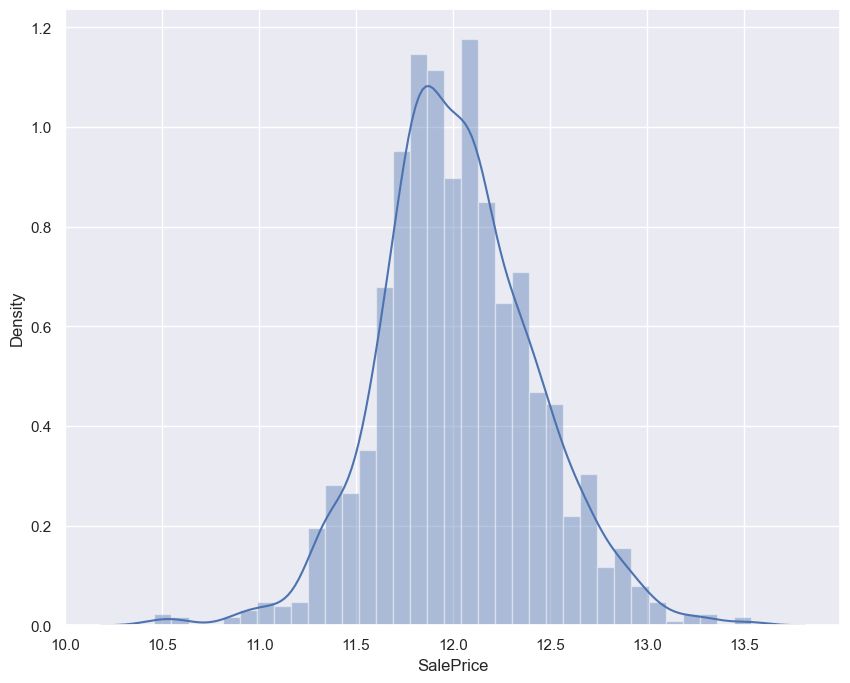

In [553]:
# Skewness and kurtosis are < 1 and under control

# Lets look at our dist plot again
plotDistPlot()

In [554]:
# Target Variable seems to have normalised distribution now

# lets look at the numerical columns in the dataset

df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247694  
1       5    2007  12.109011  
2       9    2008  12.317167  
3       2    2006  11.849398  
4      12    2008  12.429216  

[5 rows x 37 columns]

In [555]:
# from the analysis above, None of the columns, based on unique and non-null values seems droppable.
# let's try and find correlation between the numerical values of the existing columns

df_num.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.073959     0.355878  0.257320     0.817184    -0.036868   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

<Axes: >

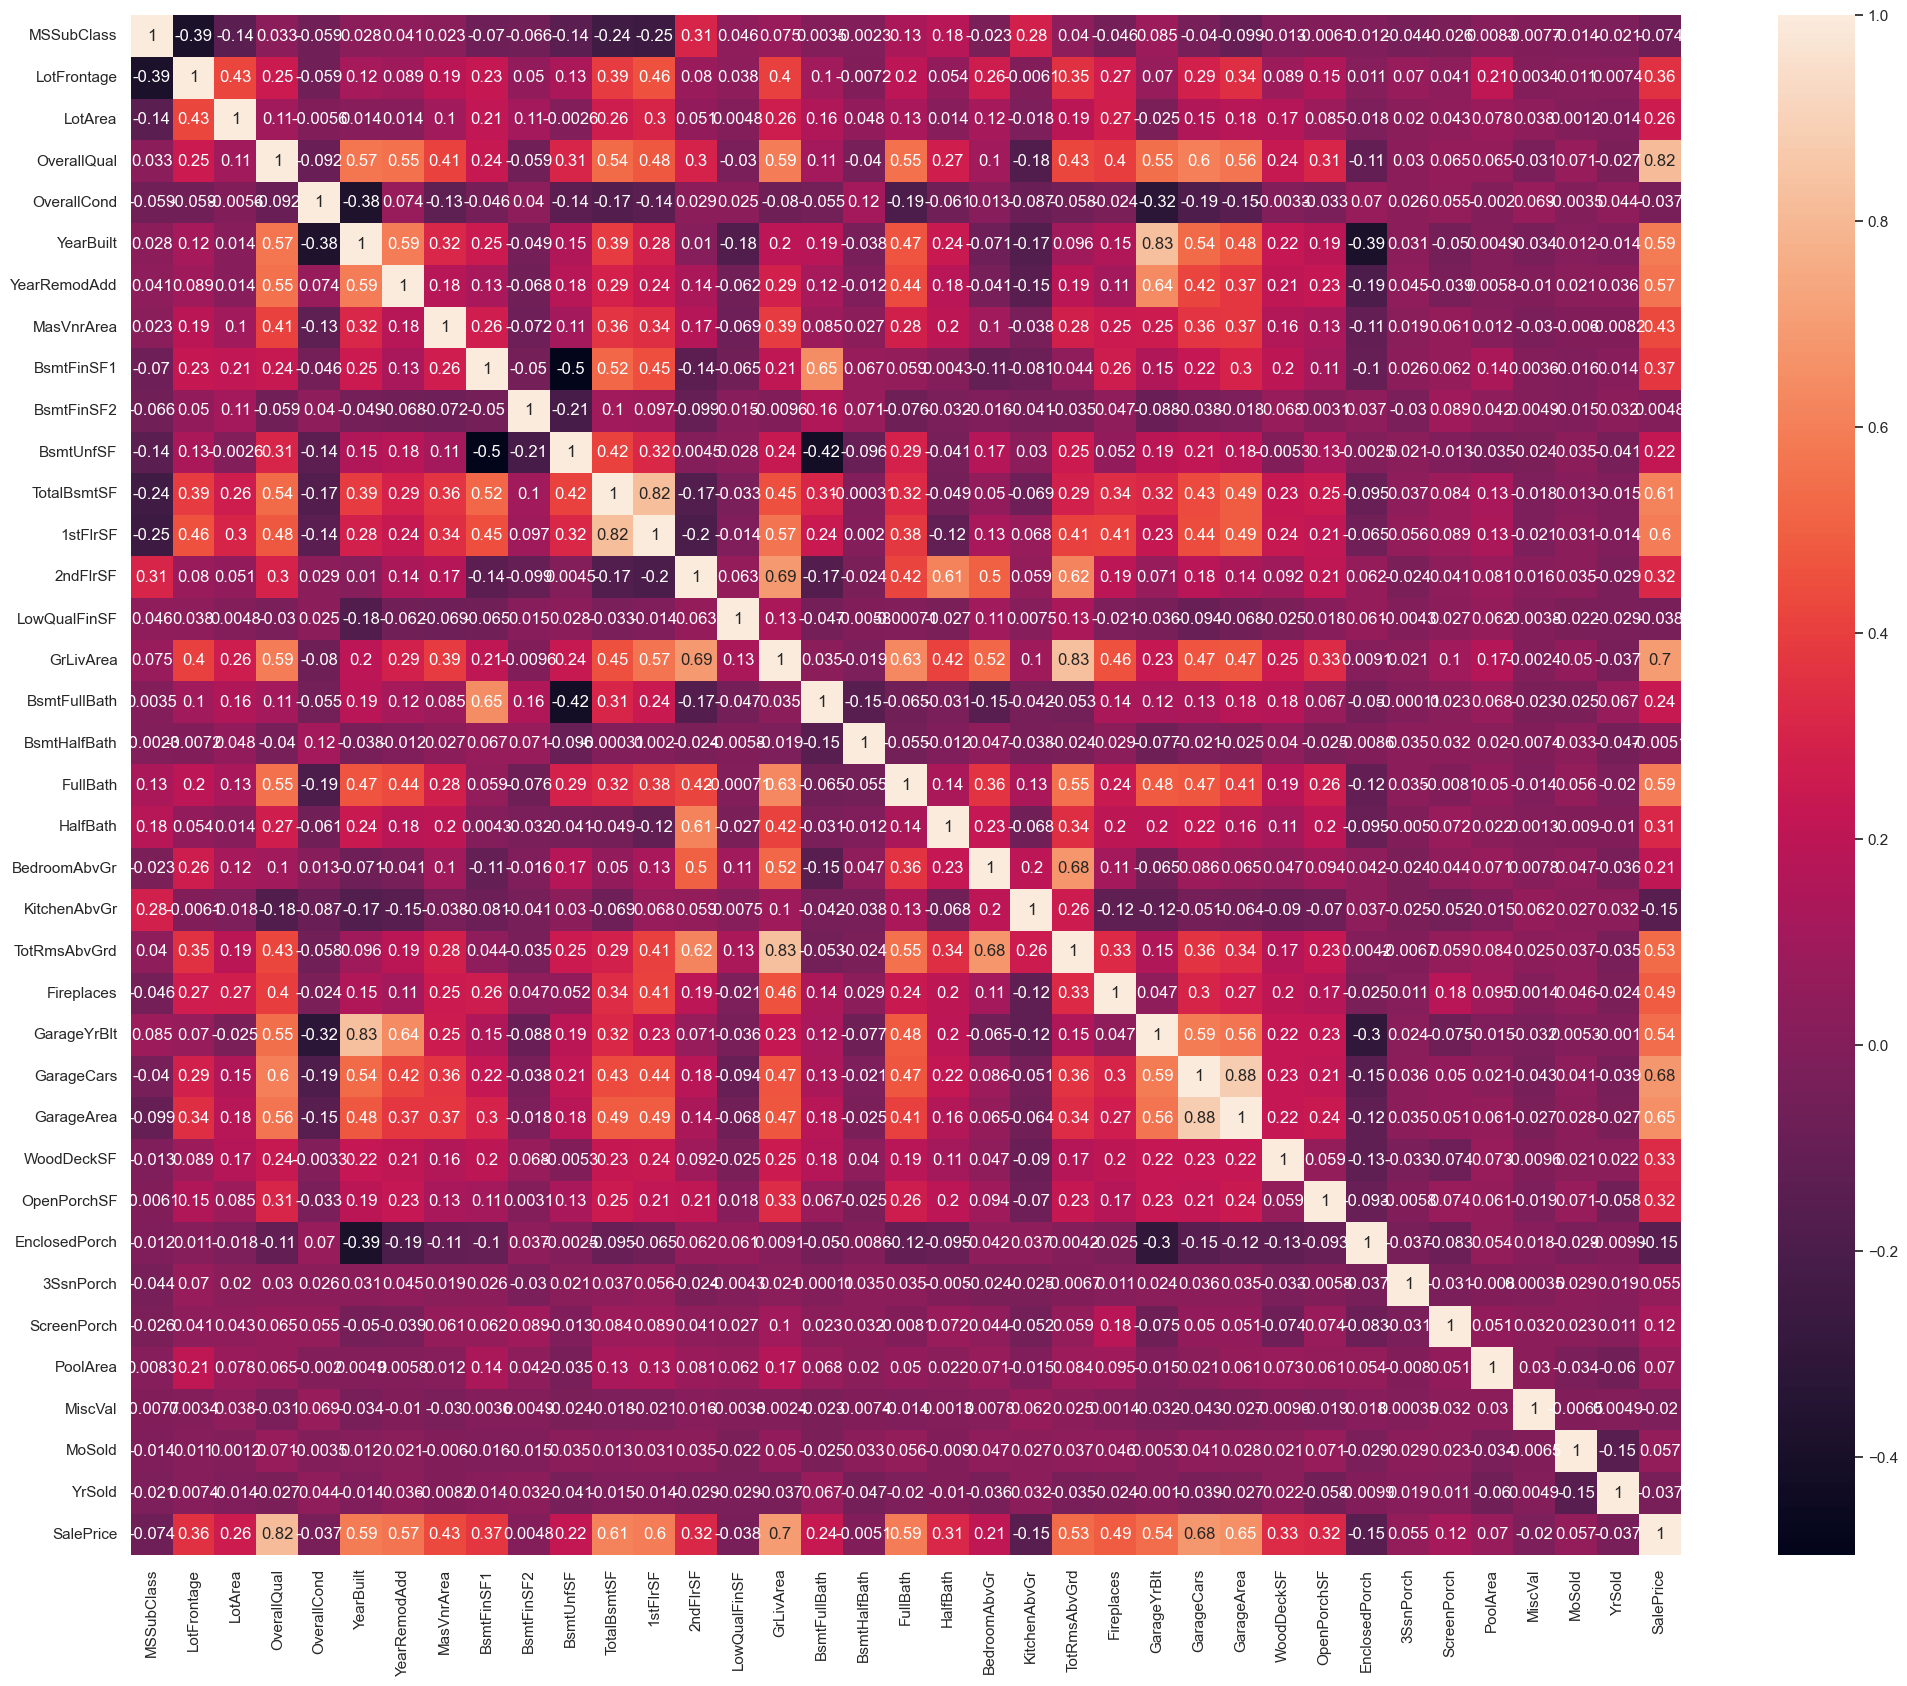

In [556]:
# lets show it in a correlation chart with the key fields as inputs
corr = df_num.corr()
plt.subplots(figsize=(25,20))
sns.set(font_scale=1)
sns.heatmap(corr, annot=True)

### Result - 
1. Sale Price is highly correlated with OverallQual, GarageCars, GarageArea
2. Even though there is multi collinearity, its not super close to 1, so we will keep these columns for our analysis.

### Step 3 - Building Feature variables

In [557]:
# Let's calculate age of the house. We need to add a new column for it
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
# HouseAge 0 means a house is newly built
df['HouseAge']

0         5
1        31
2         7
3        91
4         8
5        16
6         3
7        36
8        77
9        69
10       43
11        1
12       46
13        1
14       48
15       78
16       40
17       39
18        4
19       51
20        1
21       77
22        6
23       31
24       42
25        2
26       59
27        3
28       49
29       81
30       88
31       42
32        1
33       51
34        2
35        2
36       15
37       55
38       57
39       53
40       41
41       48
42       24
43       33
44       47
45        5
46        6
47        1
48       89
49       41
50       10
51       72
52       47
53       25
54       52
55       44
56       10
57        2
58        0
59       36
60        2
61       87
62        1
63       89
64       12
65        3
66       40
67        4
68       65
69       53
70       34
71       25
72       11
73       56
74       95
75       36
76       52
77       60
78       42
79       99
80       41
81        8
82        1
83  

In [558]:
# We can drop the YrSold and YearsBuilt column now
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  SaleType  SaleCondition  SalePrice HouseAge  
0        0       0       2        WD         Normal  12.247694        5  
1        0       0       5        WD         Normal  12.109011       31  
2        0       0       9        WD         Normal  12.317167        7  
3        0       0       2        WD        Abnorml  11.849398       91  
4        0       0      12        WD         Normal  12.429216        8  

[5 rows x 75 columns]

### Step 4: Data Cleanup and Pre-processing

In [559]:
# Missing Values replacement/treatment

# View the missing values in all features
df.isna().sum().sort_values(ascending=False)

FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
MasVnrType         8
Electrical         1
HalfBath           0
Functional         0
BsmtFullBath       0
BsmtHalfBath       0
BedroomAbvGr       0
FullBath           0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
TotRmsAbvGrd       0
MSSubClass         0
LowQualFinSF       0
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
SaleType           0
SaleCondition      0
SalePrice          0
GrLivArea          0
HeatingQC          0
2ndFlrSF           0
1stFlrSF           0
LotArea            0
Street             0
LotShape     

In [560]:
# There are a lot of missing values in columns but 2 columns have the most no. of missing values - FireplaceQu, LotFrontage
# Since the 2 columns are numerical, lets replace the missing values by mean value of that column

df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)
df['LotFrontage'].fillna(0, inplace=True)

df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)
df['GarageYrBlt'].fillna(round(df['LotFrontage'].mean(), 1), inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

df.isna().sum().sort_values(ascending=False)

MSSubClass       0
GarageYrBlt      0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageType       0
GarageFinish     0
CentralAir       0
GarageCars       0
SalePrice        0
SaleCondition    0
SaleType         0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
Electrical       0
HeatingQC        0
MSZoning         0
RoofStyle        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street      

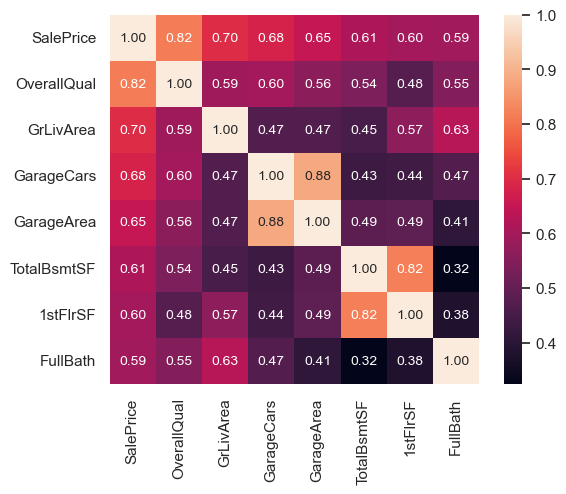

In [561]:
# Let us also check what are the most correlated values present in the data
k = 8
cols = df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

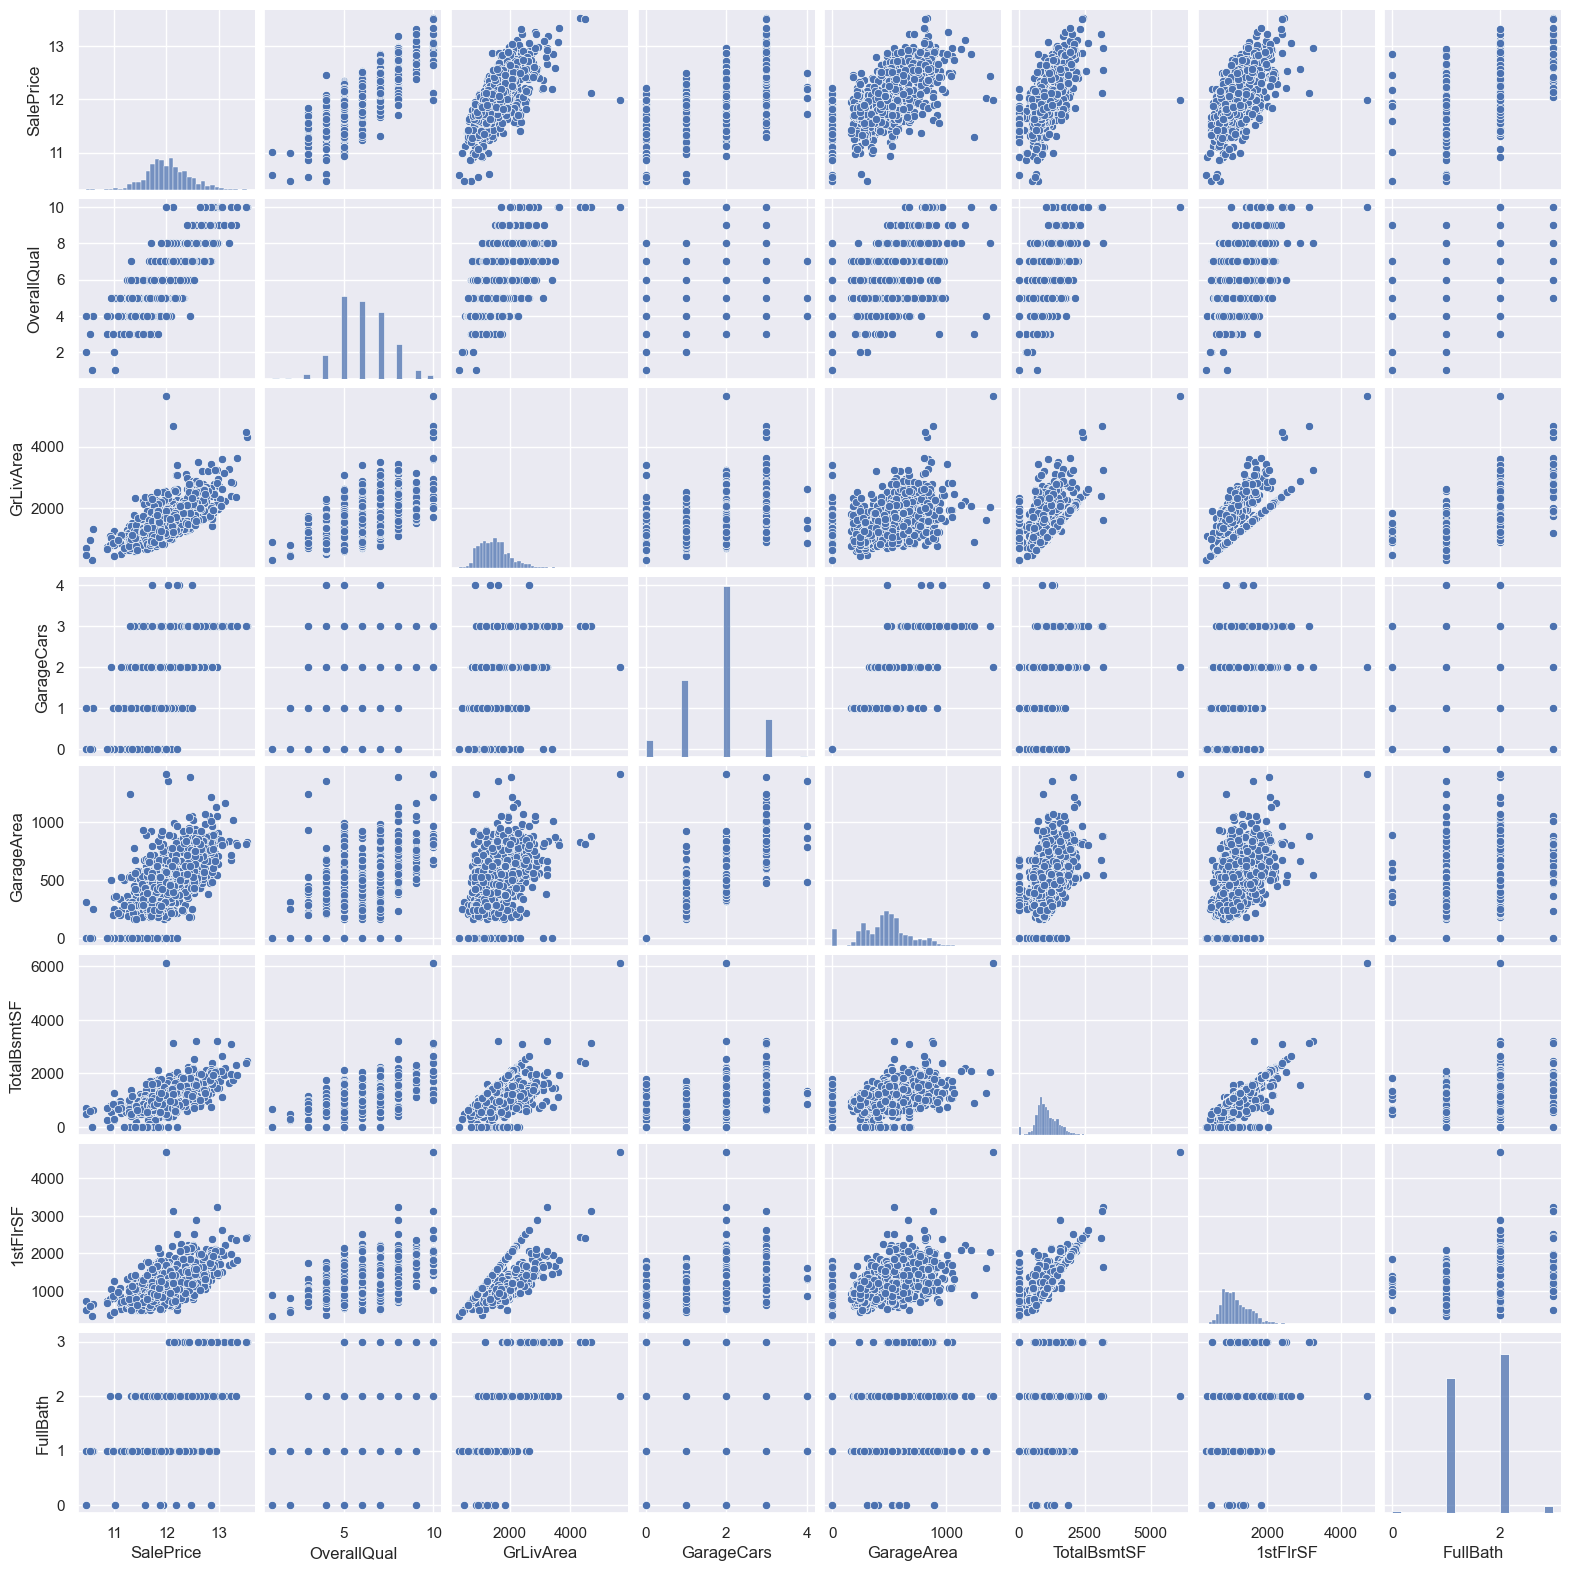

In [562]:
# Let's look at some of the most important numerical variables which has highest correlation - 
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath']
sns.pairplot(df[cols], height = 2)
plt.show()

In [563]:
# let's check categorical columns as well

df_cat= df.select_dtypes(include=['object'])
df_cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ          Gd   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   
2      CollgCr       Norm       Norm  ...          Gd        Typ          TA   
3      Crawfor       Norm       Norm  ...          Gd        Typ          Gd   
4      NoRidge       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 39 columns]

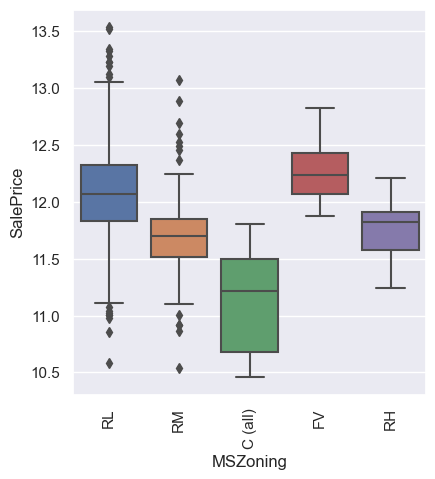

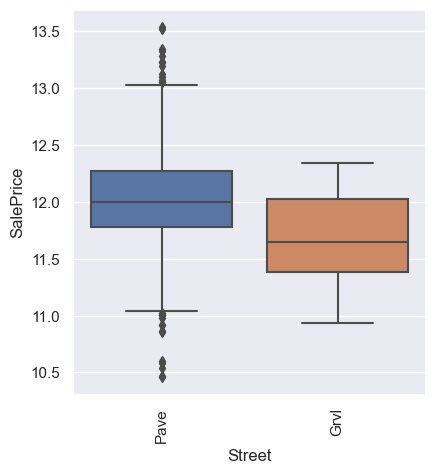

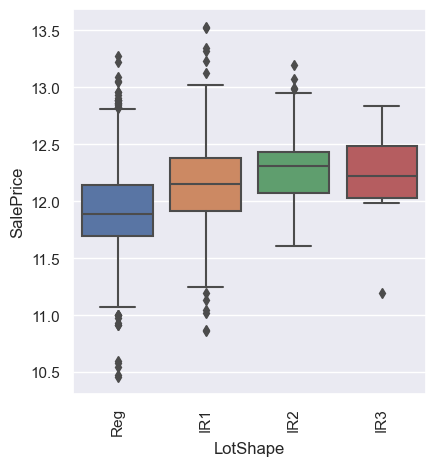

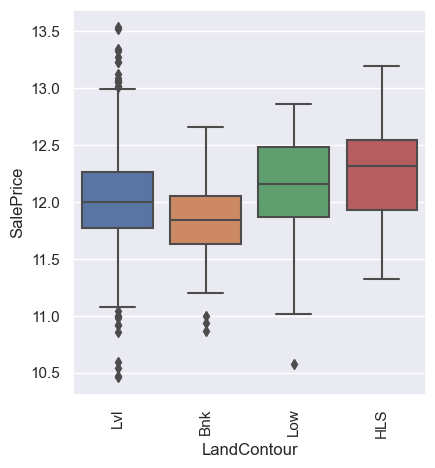

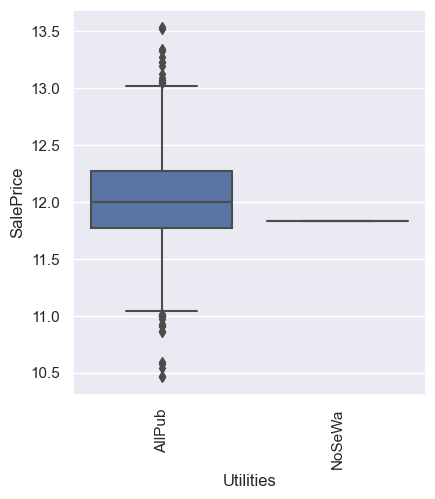

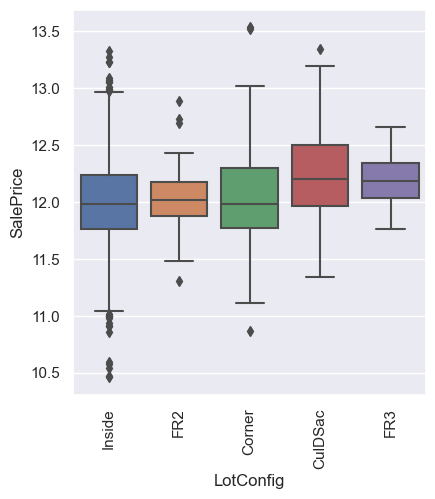

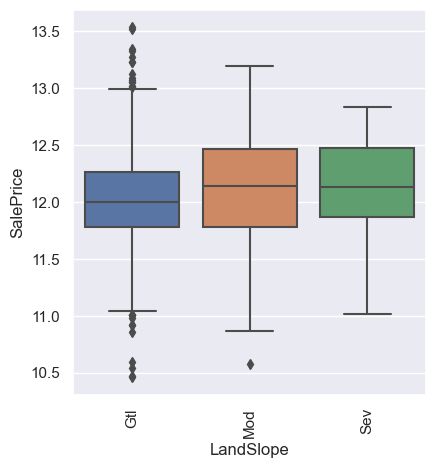

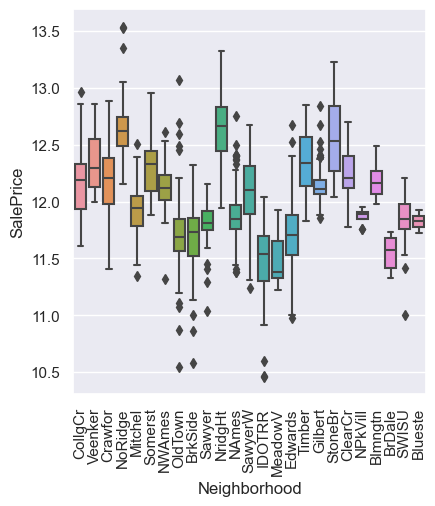

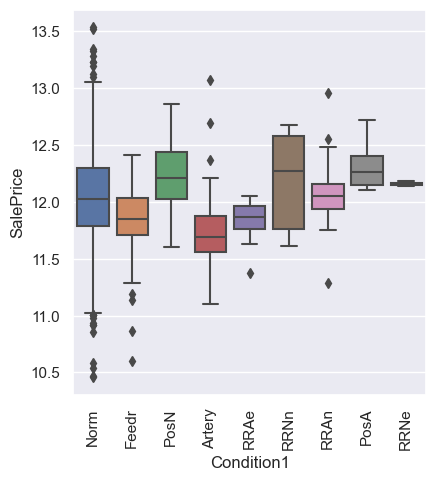

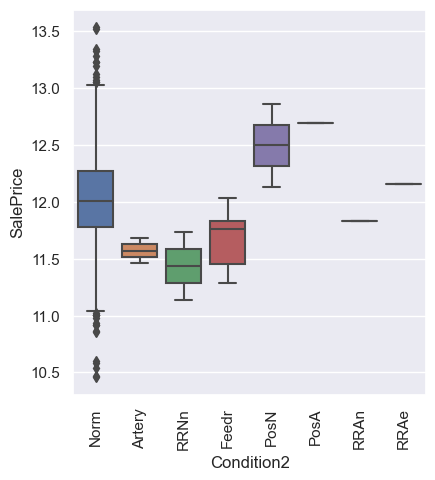

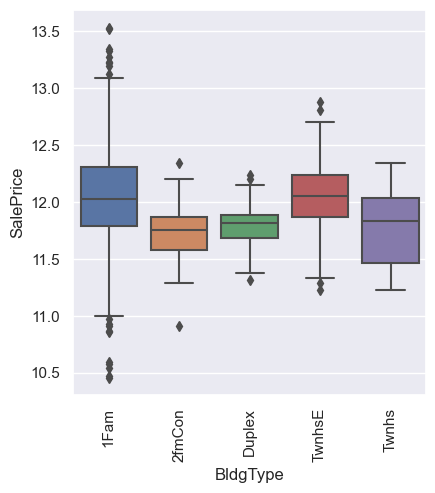

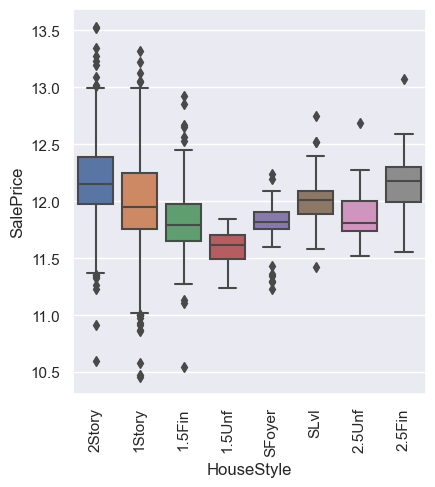

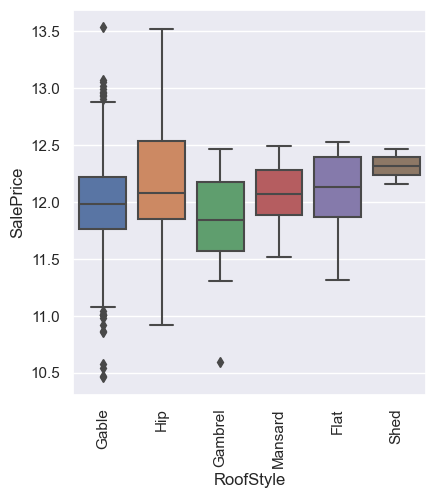

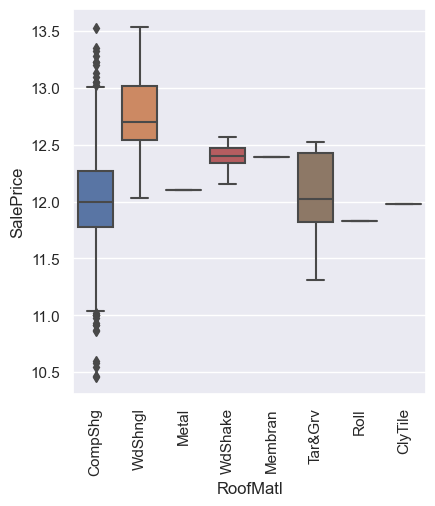

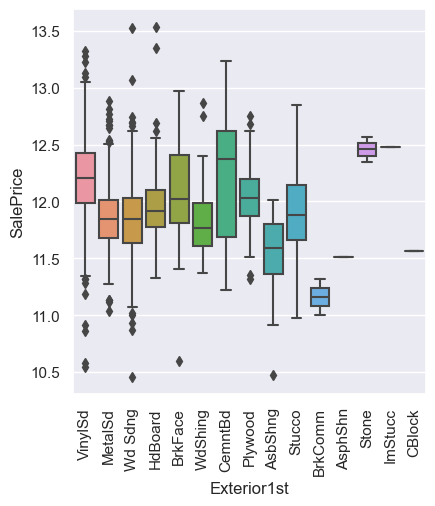

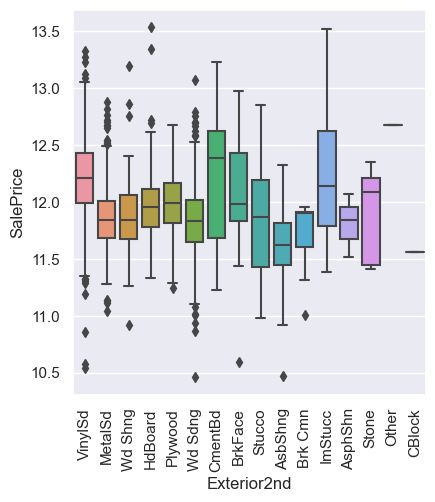

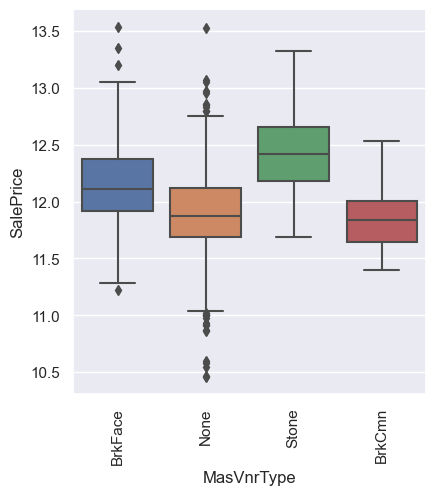

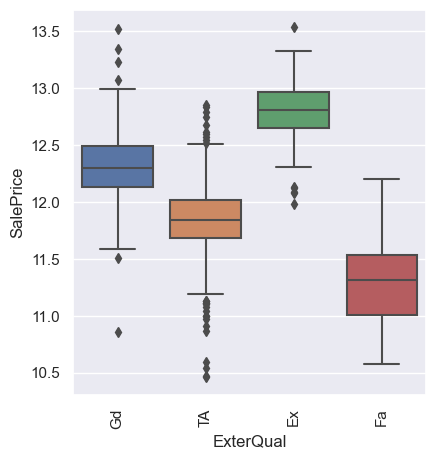

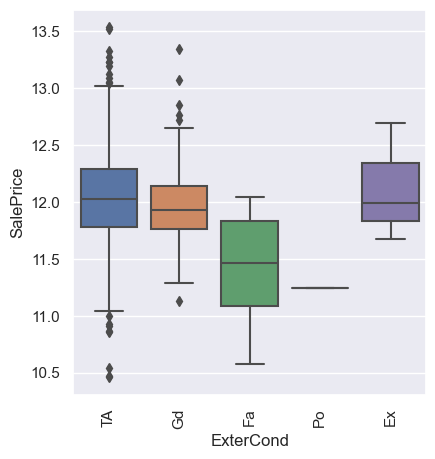

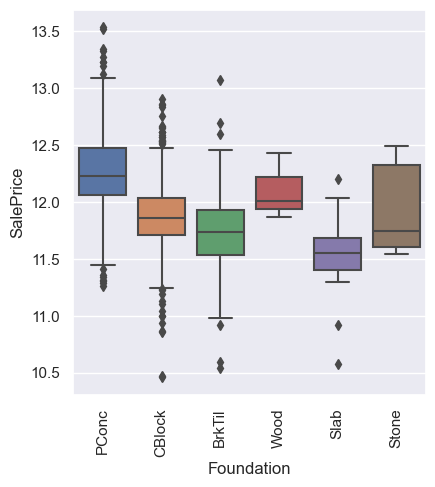

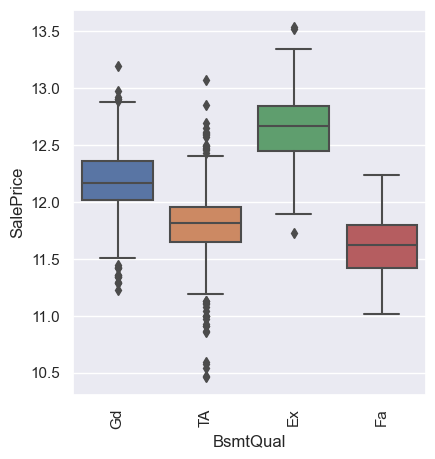

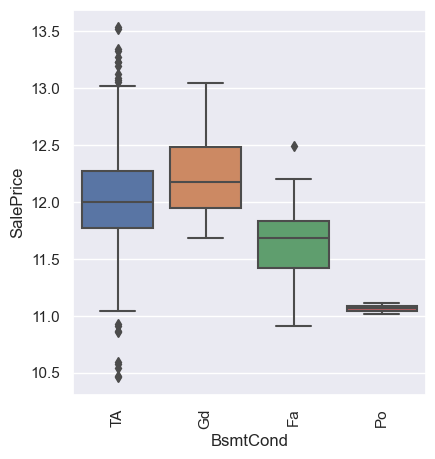

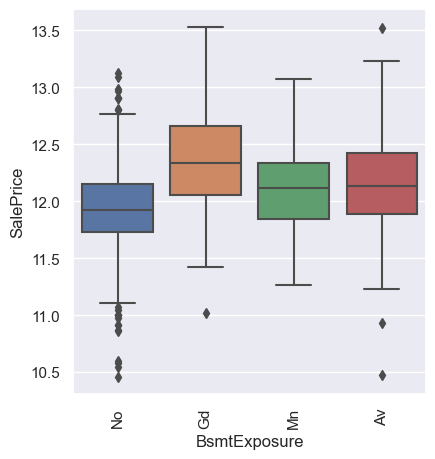

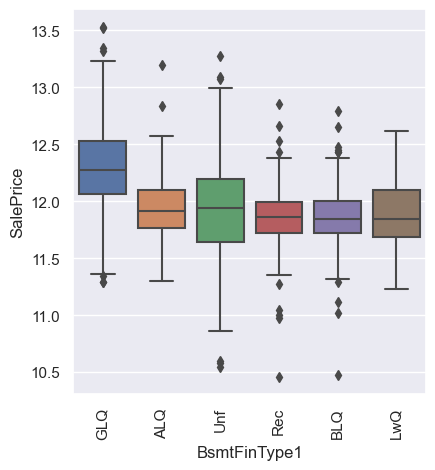

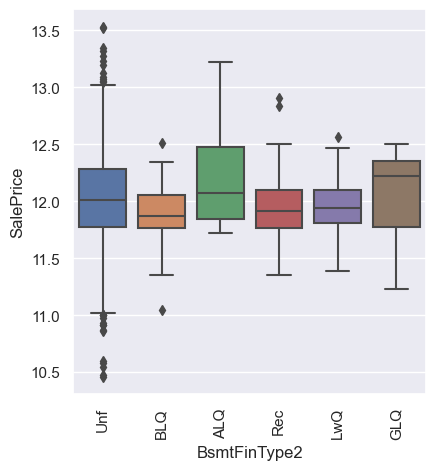

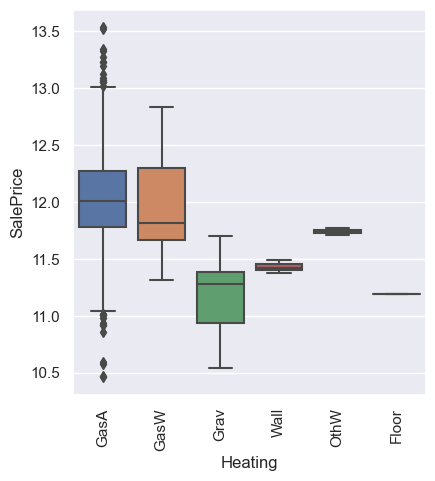

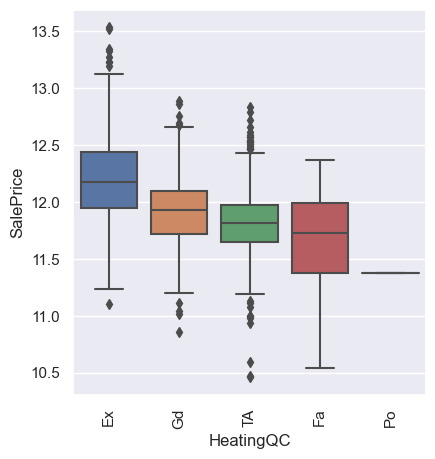

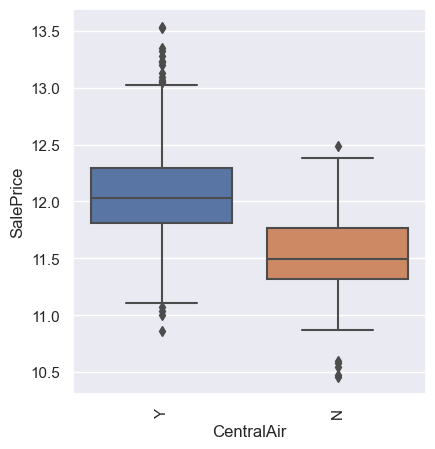

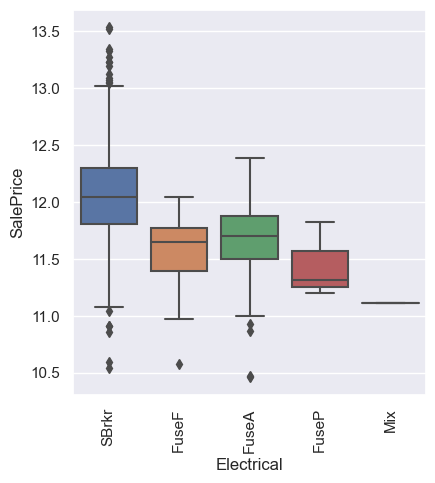

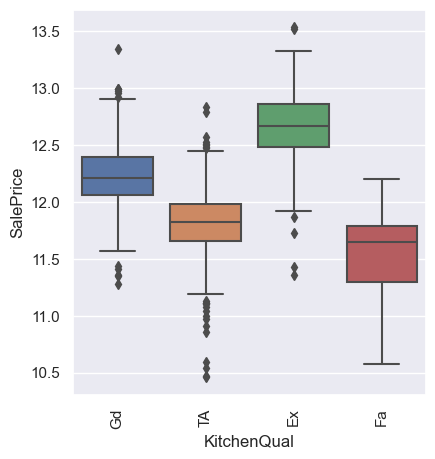

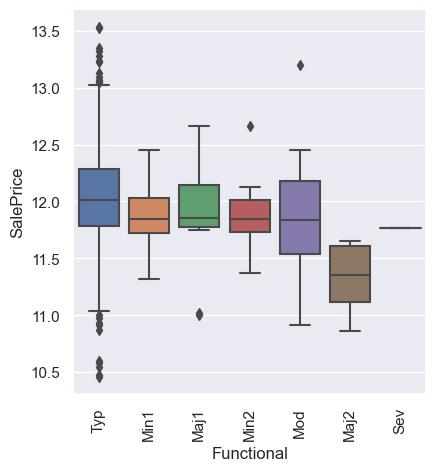

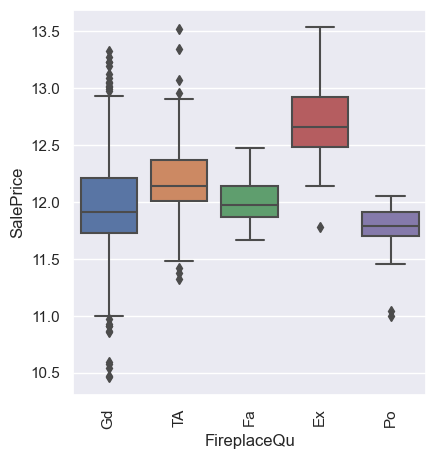

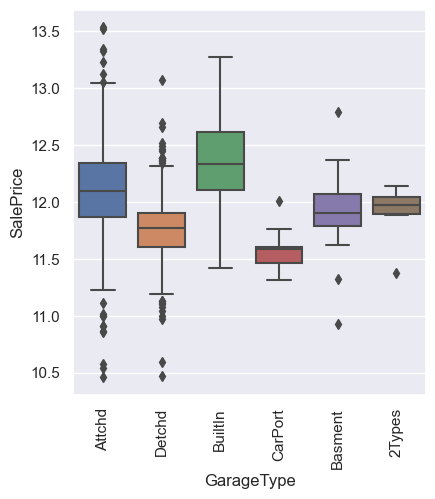

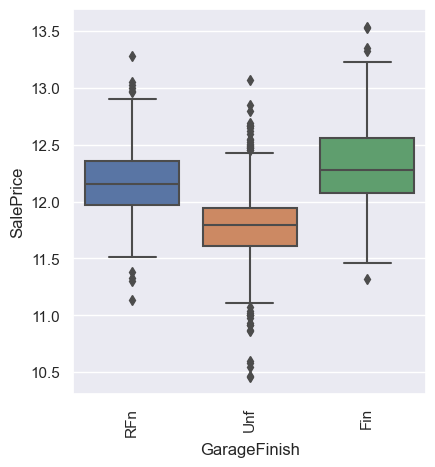

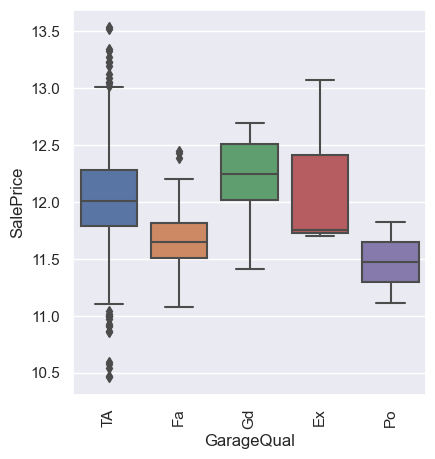

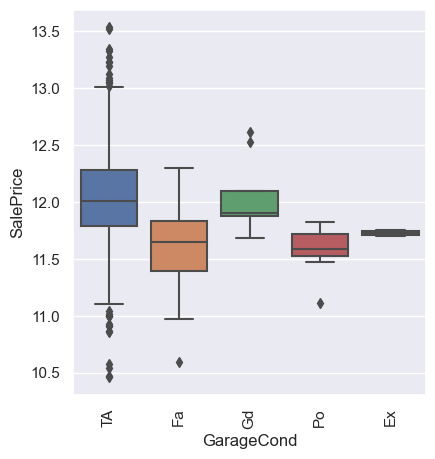

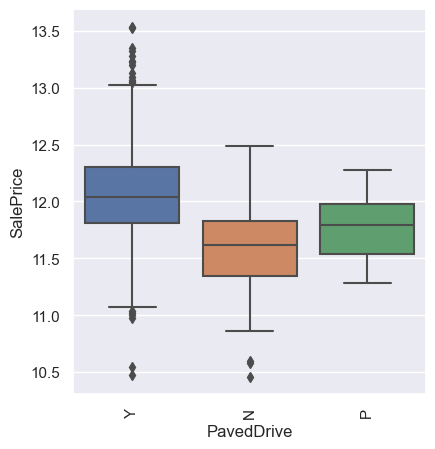

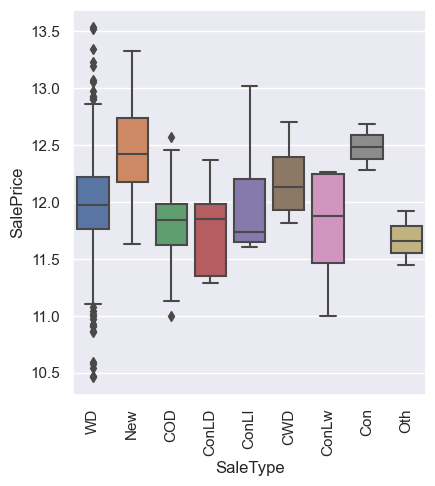

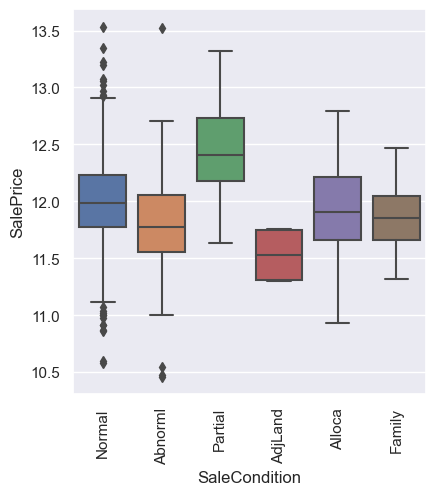

In [564]:
# Let's plot and see the distribution for all categorical values
# Lets plot and see the distribution for all categorical values

def drawBoxPlot(cols):
    for col in cols:
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,2)
        plt.xticks(rotation=90)
        sns.boxplot(x=col, y='SalePrice', data=df)
    plt.show()

drawBoxPlot(df_cat.columns)

### Result -
1. Most of these variables have a diverse relationship with the 'SalePrice'
2. House with better conditions/amenities e.g. Central AC, New Home, Good Garage quality etc. gets a higher Sale Price compared to others.

### Dummy Variables Creation

In [565]:
df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 200 columns]

In [566]:
# Dropping all categorical variables
df_1 = df

y = df_1['SalePrice']

df_1 = df_1.drop(list(df_cat.columns),axis=1)

df_1.drop(['SalePrice'], axis=1, inplace=True)
df_1.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0          60         65.0     8450            7            5          2003   
1          20         80.0     9600            6            8          1976   
2          60         68.0    11250            7            5          2002   
3          70         60.0     9550            7            5          1970   
4          60         84.0    14260            8            5          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageArea  WoodDeckSF  \
0       196.0         706           0        150  ...         548           0   
1         0.0         978           0        284  ...         460         298   
2       162.0         486           0        434  ...         608           0   
3         0.0         216           0        540  ...         642           0   
4       350.0         655           0        490  ...         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  HouseAge  
0       2         5  
1       5        31  
2       9         7  
3       2        91  
4      12         8  

[5 rows x 35 columns]

In [567]:
# concat dummy variables with housing dataset
df_1 = pd.concat([df_1, df_dummies], axis=1)

df_1

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0             60         65.0     8450            7            5   
1             20         80.0     9600            6            8   
2             60         68.0    11250            7            5   
3             70         60.0     9550            7            5   
4             60         84.0    14260            8            5   
5             50         85.0    14115            5            5   
6             20         75.0    10084            8            5   
7             60          0.0    10382            7            6   
8             50         51.0     6120            7            5   
9            190         50.0     7420            5            6   
10            20         70.0    11200            5            5   
11            60         85.0    11924            9            5   
12            20          0.0    12968            5            6   
13            20         91.0    10652            7            5   
14            20          0.0    10920            6            5   
15            45         51.0     6120            7            8   
16            20          0.0    11241            6            7   
17            90         72.0    10791            4            5   
18            20         66.0    13695            5            5   
19            20         70.0     7560            5            6   
20            60        101.0    14215            8            5   
21            45         57.0     7449            7            7   
22            20         75.0     9742            8            5   
23           120         44.0     4224            5            7   
24            20          0.0     8246            5            8   
25            20        110.0    14230            8            5   
26            20         60.0     7200            5            7   
27            20         98.0    11478            8            5   
28            20         47.0    16321            5            6   
29            30         60.0     6324            4            6   
30            70         50.0     8500            4            4   
31            20          0.0     8544            5            6   
32            20         85.0    11049            8            5   
33            20         70.0    10552            5            5   
34           120         60.0     7313            9            5   
35            60        108.0    13418            8            5   
36            20        112.0    10859            5            5   
37            20         74.0     8532            5            6   
38            20         68.0     7922            5            7   
39            90         65.0     6040            4            5   
40            20         84.0     8658            6            5   
41            20        115.0    16905            5            6   
42            85          0.0     9180            5            7   
43            20          0.0     9200            5            6   
44            20         70.0     7945            5            6   
45           120         61.0     7658            9            5   
46            50         48.0    12822            7            5   
47            20         84.0    11096            8            5   
48           190         33.0     4456            4            5   
49            20         66.0     7742            5            7   
50            60          0.0    13869            6            6   
51            50         52.0     6240            6            6   
52            90        110.0     8472            5            5   
53            20         68.0    50271            9            5   
54            80         60.0     7134            5            5   
55            20        100.0    10175            6            5   
56           160         24.0     2645            8            5   
57            60         89.0    11645            7           

### Outlier Treatment

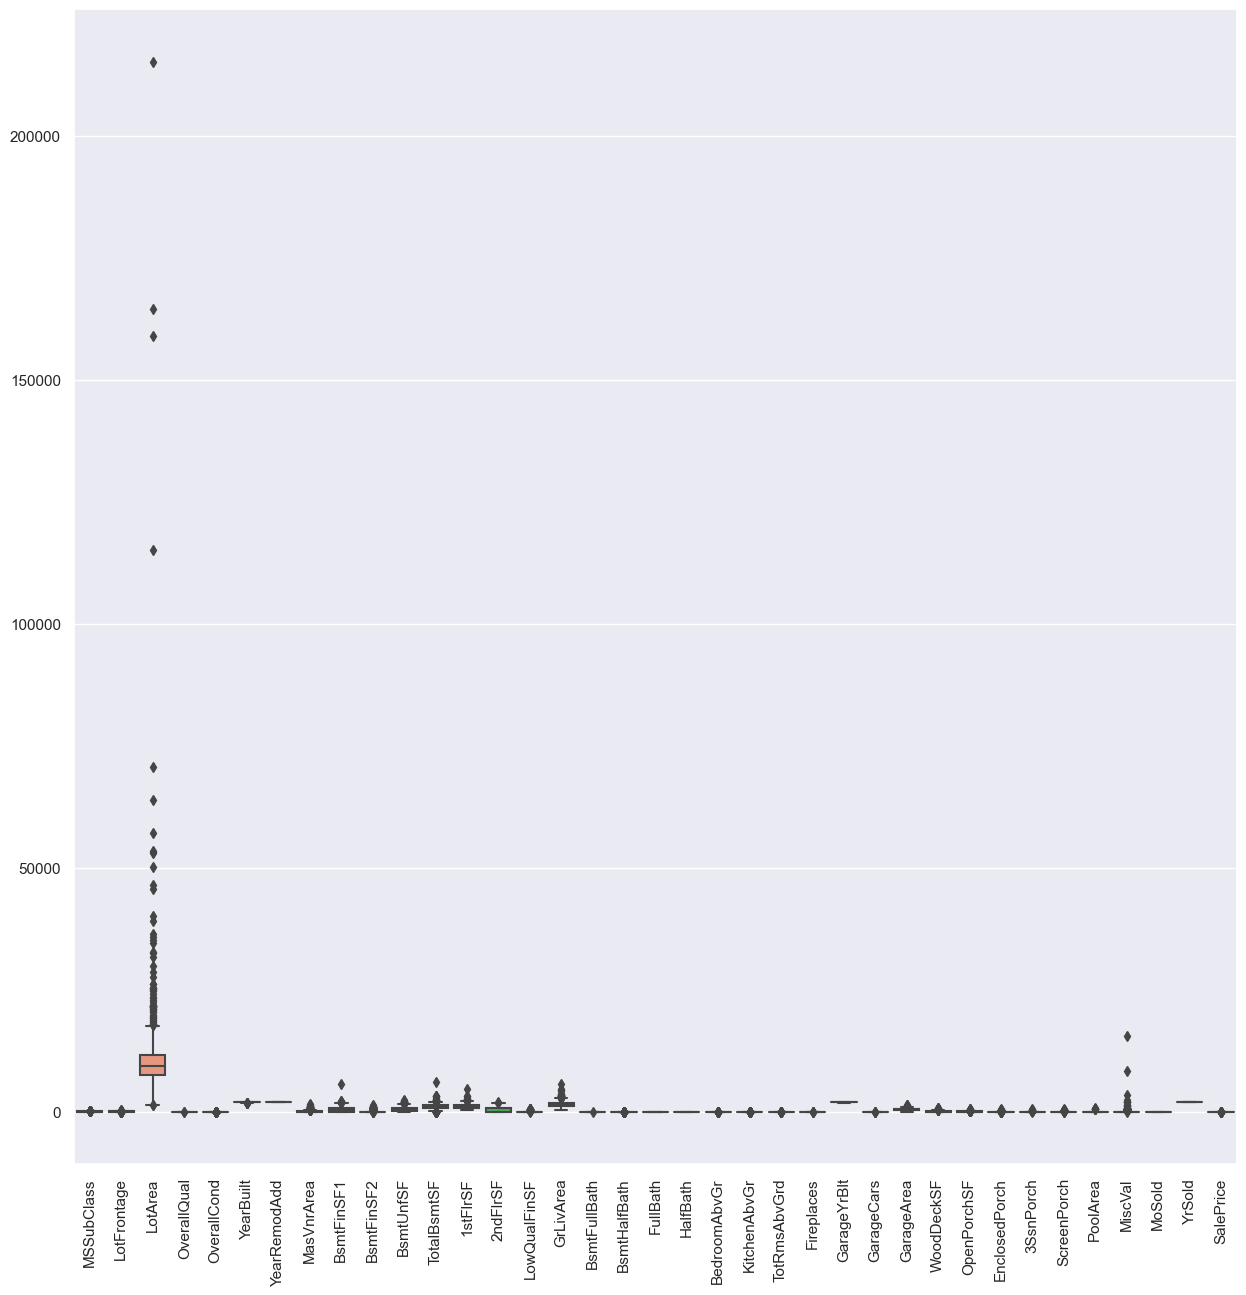

In [568]:
# Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [569]:
# Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

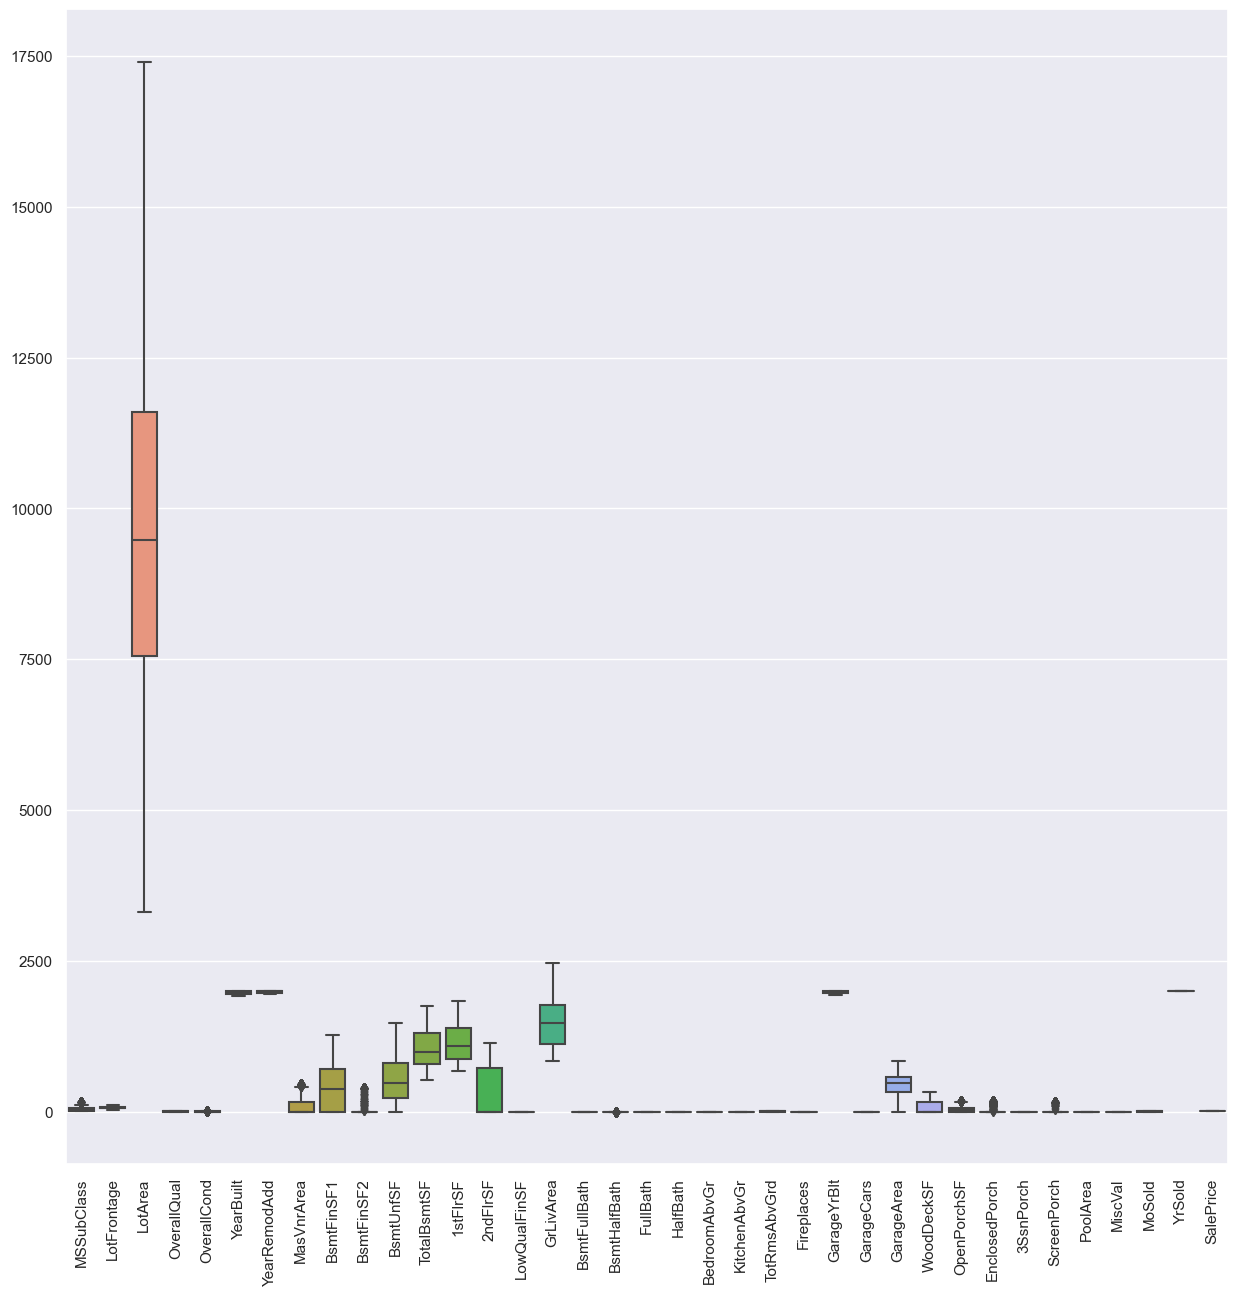

In [570]:
# Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

### Step 5 - Model Building and Evaluation 
#### Scaling the features

In [571]:
from sklearn.preprocessing import scale

cols = df_1.columns
df_1 = pd.DataFrame(scale(df_1))
df_1.columns = cols
df_1.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=235)

### Split into test and train data set

In [572]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_1, y, train_size=0.7, test_size = 0.3, random_state=100)

### Linear Regression

In [573]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [574]:
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []

    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))

    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)


    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)



    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train)
    print("RMSE (Test) =", '%.2f' % rmse_test)


    return metric


In [575]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [576]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

1109212774.2586064
[-1.31935318e-02  5.44089402e-04  3.22567000e-02  5.35821123e-02
  3.93266600e-02  2.39136619e-02  1.50598407e-03 -1.01741870e+11
 -3.59855147e+10 -9.85673289e+10  9.78620634e+10 -1.97398673e+11
 -2.22899294e+11 -2.48278225e+10  2.68319763e+11  1.07854148e-02
  8.34577460e-04  3.59269042e-03  2.03338894e-03  7.42226655e-03
 -1.33057672e-02  2.71615714e-03  1.11314796e-02  3.14153114e-03
  1.30964020e-02  2.36846470e-02  1.06740726e-02  4.84676269e-03
  6.72744933e-03  4.84785857e-03  8.74657617e-03  4.40541482e-03
  9.50704899e-04  5.91278076e-04 -6.26621246e-02  9.19265747e-02
  4.56565619e-02  1.80212021e-01  1.37912750e-01  5.48934937e-03
  2.31933594e-03  7.24792480e-04  3.05938721e-03  1.21450424e-03
 -9.19342041e-04  6.45828247e-03 -1.93786621e-03  6.61087036e-03
 -7.11059570e-03 -7.12871552e-04 -3.46374512e-03  4.51278687e-03
 -2.16369629e-02  2.31702626e-03 -3.35311890e-03  1.68647766e-02
  9.60159302e-03  4.02832031e-03  3.11036110e-02 -6.50024414e-03
  4.52

In [577]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = show_metrics(y_train, y_pred_train, y_test, y_pred_test)

R-Squared (Train) = 0.96
R-Squared (Test) = -8748970639566851538944.00
RSS (Train) = 6.76
RSS (Test) = 630525812058097293721600.00
MSE (Train) = 0.01
MSE (Test) = 1439556648534468722688.00
RMSE (Train) = 0.08
RMSE (Test) = 37941489803.83


### Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [578]:
## Ridge Regression

In [579]:
# list of alphas to tune - if value too high it will lead to under fitting, if it is too low, 
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [580]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [581]:

#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.23636998e-02 -2.31514674e-03  3.07196447e-02  5.80356228e-02
  3.81228059e-02  2.34259392e-02  1.19484176e-03  2.21414933e-02
  6.88775404e-03  4.74339156e-03  3.03296257e-02  4.82242719e-02
  4.60520461e-02  4.35197322e-04  7.37745913e-02  1.44341041e-02
  1.10789216e-03  7.40207645e-03  4.47430087e-03  9.16045414e-03
 -1.44168463e-02  4.75303660e-03  1.10158654e-02  1.91521187e-03
  2.14141009e-02  1.64621721e-02  1.08516489e-02  3.90924024e-03
  7.16573885e-03  5.24363476e-03  9.82776609e-03 -1.71966096e-03
  5.93711531e-04  5.84393179e-04 -5.09147970e-02  6.74683789e-02
  3.45142793e-02  1.34850372e-01  1.02643665e-01  6.13379958e-03
  2.58815236e-03 -2.78190058e-03  3.23268175e-03  3.25050522e-03
  3.10781005e-04  8.40828194e-03 -2.40802255e-03  7.03528669e-03
 -7.79917017e-03 -1.50946950e-03 -3.21667587e-03  4.35080338e-03
 -1.86502086e-02  1.35134466e-03 -4.75726163e-03  1.14019999e-02
  8.81616216e-03  2.30888113e-03  2.88140577e-02 -1.13312232e-02
  2.24149272e-03 -3.57525

In [582]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = show_metrics(y_train, y_pred_train, y_test, y_pred_test)

R-Squared (Train) = 0.96
R-Squared (Test) = 0.87
RSS (Train) = 7.05
RSS (Test) = 9.23
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.08
RMSE (Test) = 0.15


### Lasso

In [583]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [584]:
# Printing the best hyperparameter alpha
model_cv.best_params_

{'alpha': 0.001}

In [585]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [586]:
lasso.coef_

array([-1.49860998e-02, -0.00000000e+00,  2.24836354e-02,  6.59945166e-02,
        3.99625213e-02,  2.36283128e-02,  1.29659370e-03,  1.35318539e-02,
        5.99489337e-04, -0.00000000e+00,  3.35020162e-02,  4.05926482e-03,
        0.00000000e+00, -3.44409184e-03,  1.36447866e-01,  1.91676680e-02,
        0.00000000e+00,  5.99542596e-03,  4.15401857e-03,  3.50656049e-03,
       -1.24197740e-02,  5.62040442e-03,  1.31429268e-02,  9.72419128e-04,
        2.51275638e-02,  1.24247751e-02,  9.81989766e-03,  3.81809352e-03,
        3.30575773e-03,  3.93692461e-03,  8.08943801e-03, -4.80942238e-03,
       -0.00000000e+00, -0.00000000e+00, -5.29280800e-02,  3.44215734e-02,
        1.83382008e-02,  7.51676926e-02,  4.82648448e-02,  4.50257031e-03,
        6.50659415e-04, -3.26128657e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.63111816e-03, -1.89962658e-03,  7.64254858e-03,
       -4.06128173e-03, -1.42509176e-04, -3.94870738e-05,  1.27393861e-03,
       -8.84550961e-03,  

In [587]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = show_metrics(y_train, y_pred_train, y_test, y_pred_test)

R-Squared (Train) = 0.95
R-Squared (Test) = 0.87
RSS (Train) = 7.95
RSS (Test) = 9.06
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.09
RMSE (Test) = 0.14


In [588]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Linear Regression': metric
            }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.578650e-01          0.956091          0.950476
1   R2 Score (Test)      -8.748971e+21          0.871928          0.874322
2       RSS (Train)       6.762338e+00          7.047133          7.948208
3        RSS (Test)       6.305258e+23          9.229948          9.057420
4       MSE (Train)       6.623250e-03          0.006902          0.007785
5        MSE (Test)       1.439557e+21          0.021073          0.020679
6      RMSE (Train)       8.138335e-02          0.083079          0.088231
7       RMSE (Test)       3.794149e+10          0.145165          0.143802

### Both Ridge & Lasso regression also we are getting a good score of ~95% on training data and ~87% on test data

## Lets observe the changes in the coefficients after regularization

In [589]:
betas = pd.DataFrame(index=df_1.columns)

In [590]:
betas.rows = df_1.columns

In [591]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [592]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

Linear     Ridge  Lasso
LotFrontage           5.440894e-04 -0.002315   -0.0
BsmtUnfSF            -9.856733e+10  0.004743   -0.0
2ndFlrSF             -2.228993e+11  0.046052    0.0
BsmtHalfBath          8.345775e-04  0.001108    0.0
MiscVal               9.507049e-04  0.000594   -0.0
MoSold                5.912781e-04  0.000584   -0.0
LotShape_Reg          3.059387e-03  0.003233    0.0
LandContour_HLS       1.214504e-03  0.003251    0.0
LandContour_Low      -9.193420e-04  0.000311    0.0
Neighborhood_Blueste  2.317026e-03  0.001351    0.0
Neighborhood_CollgCr  4.028320e-03  0.002309    0.0
Neighborhood_Gilbert  4.524231e-03  0.002241   -0.0
Neighborhood_NAmes    8.316040e-03  0.004168   -0.0
Neighborhood_NPkVill  9.651184e-04 -0.000610   -0.0
Neighborhood_OldTown  1.342773e-02  0.005206   -0.0
Neighborhood_Timber   2.356529e-03  0.001492    0.0
Condition1_RRNe       1.670837e-03  0.001328    0.0
Condition2_Feedr      2.851486e-03  0.001481   -0.0
BldgType_2fmCon      -2.119064e-03 -0.002135   -0.0
BldgType_Duplex      -3.267288e-03 -0.001177   -0.0
BldgType_TwnhsE       3.311157e-03 -0.000576   -0.0
HouseStyle_2.5Unf     1.861572e-03  0.000434    0.0
HouseStyle_2Story    -7.706642e-03 -0.010290   -0.0
HouseStyle_SFoyer    -4.833221e-03 -0.003706   -0.0
HouseStyle_SLvl      -4.455566e-03 -0.004505    0.0
RoofStyle_Gambrel    -5.409241e-03 -0.004237    0.0
RoofStyle_Hip        -2.357197e-02 -0.019619    0.0
Exterior1st_AsphShn  -4.307605e+08  0.000850   -0.0
Exterior1st_CemntBd  -4.348755e-03 -0.004537    0.0
Exterior1st_Plywood   1.145172e-02  0.009000    0.0
Exterior1st_Stucco    8.903503e-03  0.005847   -0.0
Exterior2nd_AsphShn   7.455874e+08  0.000491   -0.0
Exterior2nd_Brk Cmn   2.513885e-03  0.003259    0.0
Exterior2nd_BrkFace  -3.660202e-03 -0.002002   -0.0
Exterior2nd_HdBoard   1.874924e-03  0.004022   -0.0
Exterior2nd_ImStucc  -2.216339e-03 -0.000035   -0.0
Exterior2nd_Other     8.434314e+05  0.000000    0.0
Exterior2nd_Plywood   3.971100e-03  0.005480    0.0
Exterior2nd_Stone    -1.686096e-03 -0.002302    0.0
Exterior2nd_VinylSd   4.497528e-03  0.007838    0.0
Exterior2nd_Wd Sdng   1.261139e-02  0.012166    0.0
MasVnrType_BrkFace   -9.689331e-04  0.000007    0.0
ExterQual_TA          5.699158e-03  0.010062   -0.0
ExterCond_Gd         -1.945305e-02 -0.010052   -0.0
ExterCond_Po          3.841230e+04  0.000000    0.0
Foundation_CBlock     9.399414e-03  0.011808    0.0
Foundation_Slab      -9.593964e-04 -0.001640   -0.0
BsmtQual_Fa          -2.871037e-03 -0.003644   -0.0
BsmtExposure_Mn       1.430511e-04 -0.000932   -0.0
BsmtFinType2_LwQ     -6.916046e-03 -0.005033   -0.0
BsmtFinType2_Rec     -6.553650e-03 -0.005979   -0.0
BsmtFinType2_Unf     -5.466461e-03 -0.004222    0.0
Heating_GasA          2.052307e-02  0.016904    0.0
HeatingQC_Fa         -3.356934e-04  0.000513    0.0
Electrical_Mix        1.595409e+01  0.000000    0.0
Electrical_SBrkr     -1.272202e-03 -0.000806    0.0
Functional_Min1       6.748199e-03  0.004916    0.0
FireplaceQu_Fa        2.758980e-03  0.001870   -0.0
FireplaceQu_Gd        1.874542e-02  0.011142   -0.0
GarageType_BuiltIn    6.772637e-03  0.003100    0.0
GarageType_CarPort    6.149292e-03  0.004687    0.0
GarageQual_Po        -1.688749e+10 -0.003093   -0.0
GarageQual_TA        -7.858664e+10 -0.004276    0.0
GarageCond_TA         6.975248e+10 -0.009316    0.0
SaleType_ConLI       -1.449585e-04  0.000299   -0.0
SaleType_WD           9.498596e-04  0.003163    0.0

In [593]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(66, 3)

### The above 66 features out of 384 (from X_train) have been removed by Lasso. In this way, lasso performs feature selection

### Below are the features selected by Lasso

In [594]:
# View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

MSSubClass              -0.014986
LotArea                  0.022484
OverallQual              0.065995
OverallCond              0.039963
YearRemodAdd             0.023628
MasVnrArea               0.001297
BsmtFinSF1               0.013532
BsmtFinSF2               0.000599
TotalBsmtSF              0.033502
1stFlrSF                 0.004059
LowQualFinSF            -0.003444
GrLivArea                0.136448
BsmtFullBath             0.019168
FullBath                 0.005995
HalfBath                 0.004154
BedroomAbvGr             0.003507
KitchenAbvGr            -0.012420
TotRmsAbvGrd             0.005620
Fireplaces               0.013143
GarageYrBlt              0.000972
GarageCars               0.025128
GarageArea               0.012425
WoodDeckSF               0.009820
OpenPorchSF              0.003818
EnclosedPorch            0.003306
3SsnPorch                0.003937
ScreenPorch              0.008089
PoolArea                -0.004809
HouseAge                -0.052928
MSZoning_FV   

## Inferences for "Surprise Housing"
### Let us look at the top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso model

In [595]:
betas['Ridge'].sort_values(ascending=False)[:10]

RoofMatl_CompShg    0.278458
RoofMatl_Tar&Grv    0.185632
RoofMatl_WdShngl    0.138270
MSZoning_RL         0.134850
RoofMatl_WdShake    0.114444
MSZoning_RM         0.102644
GrLivArea           0.073775
MSZoning_FV         0.067468
RoofMatl_Membran    0.063108
RoofMatl_Metal      0.059835
Name: Ridge, dtype: float64

In [596]:
# To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

RoofMatl_CompShg    1.321092
RoofMatl_Tar&Grv    1.203979
RoofMatl_WdShngl    1.148286
MSZoning_RL         1.144366
RoofMatl_WdShake    1.121250
MSZoning_RM         1.108096
GrLivArea           1.076564
MSZoning_FV         1.069796
RoofMatl_Membran    1.065142
RoofMatl_Metal      1.061661
Name: Ridge, dtype: float64

In [597]:
# View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

RoofMatl_CompShg    0.246937
RoofMatl_Tar&Grv    0.166448
GrLivArea           0.136448
RoofMatl_WdShngl    0.123254
RoofMatl_WdShake    0.103563
MSZoning_RL         0.075168
OverallQual         0.065995
RoofMatl_Membran    0.053041
RoofMatl_Metal      0.051343
RoofMatl_Roll       0.049605
Name: Lasso, dtype: float64

In [598]:
# To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

RoofMatl_CompShg    1.280099
RoofMatl_Tar&Grv    1.181102
GrLivArea           1.146195
RoofMatl_WdShngl    1.131171
RoofMatl_WdShake    1.109116
MSZoning_RL         1.078065
OverallQual         1.068221
RoofMatl_Membran    1.054473
RoofMatl_Metal      1.052684
RoofMatl_Roll       1.050856
Name: Lasso, dtype: float64

### Results - 
The variables significant in predicting the price of a house are - 
1. RoofMatl_CompShg     --> Roof Material is "Standard (Composite) Shingle"
2. RoofMatl_Tar&Grv     --> Roof Material is "Gravel & Tar"
3. GrLivArea            --> Above grade (ground) living area square feet
4. RoofMatl_WdShngl     --> Roof Material is "Wood Shingles"
5. RoofMatl_WdShake     --> Roof Material is "Wood Shakes"
6. MSZoning_RL          --> Residential Low Density
7. OverallQual          --> Overall material and finish of the house
8. RoofMatl_Membran     --> Roof Material is "Membrane"
9. RoofMatl_Metal       --> Roof Material is "Metal"
10. RoofMatl_Roll       --> Roof Material is "Roll"


Optimal value of lambda for Ridge Regression = 4
Optimal value of lambda for Lasso = 0.001

### Step 6: Assignment 2

In [599]:
### Ridge Regression
# Let's double the alpha to 8 and re-run the checks
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.20615913e-02 -3.74066057e-03  2.94153363e-02  6.02573978e-02
  3.72700075e-02  2.31871500e-02  1.07847180e-03  1.73112507e-02
  6.50553573e-03  5.14751970e-03  2.55743774e-02  4.59788680e-02
  4.51837293e-02  1.21901091e-03  7.14738789e-02  1.64974181e-02
  1.28689202e-03  9.76936182e-03  6.00040462e-03  1.00638462e-02
 -1.49089790e-02  6.32250442e-03  1.11286903e-02  1.40887560e-03
  2.57500039e-02  1.28370825e-02  1.09560056e-02  3.37387701e-03
  7.27492197e-03  5.48410170e-03  1.03288542e-02 -4.99431516e-03
  4.01910884e-04  5.58263754e-04 -4.41871432e-02  5.32797297e-02
  2.79684921e-02  1.08320411e-01  8.18640848e-02  6.32925227e-03
  2.68753888e-03 -4.70906315e-03  3.29856345e-03  4.31447295e-03
  1.06842557e-03  9.48570561e-03 -2.62423798e-03  7.28804807e-03
 -8.20750285e-03 -1.97568604e-03 -3.15419834e-03  4.24373734e-03
 -1.67413027e-02  7.47432187e-04 -5.52170866e-03  8.41440588e-03
  8.58494526e-03  1.42920836e-03  2.76767623e-02 -1.39079694e-02
  1.07069539e-03 -4.56801

In [600]:
# Make predictions
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Check metrics
updatedRidgeMetrics = show_metrics(y_train, y_pred_train, y_test, y_pred_test)

R-Squared (Train) = 0.95
R-Squared (Test) = 0.87
RSS (Train) = 7.47
RSS (Test) = 9.04
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.09
RMSE (Test) = 0.14


In [601]:
### Lasso Regression
# Let's double the alpha to 8 and re-run the checks
alpha = 0.002

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [602]:
# Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

# Check metrics
updatedLassoMetrics = show_metrics(y_train, y_pred_train, y_test, y_pred_test)

R-Squared (Train) = 0.95
R-Squared (Test) = 0.87
RSS (Train) = 7.47
RSS (Test) = 9.04
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.09
RMSE (Test) = 0.14


In [603]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression (alpha = 4)' : metric2,
            'Updated Ridge Regression (alpha = 8)' : updatedRidgeMetrics,
            'Lasso Regression (alpha = 0.001)' : metric3,
            'Updated Ridge Regression (alpha = 0.002)' : updatedLassoMetrics
            }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression (alpha = 4)', 'Updated Ridge Regression (alpha = 8)', 'Lasso Regression (alpha = 0.001)', 'Updated Ridge Regression (alpha = 0.002)'] )
final_metric.set_index('Metric')

Ridge Regression (alpha = 4)  \
Metric                                           
R2 Score (Train)                      0.956091   
R2 Score (Test)                       0.871928   
RSS (Train)                           7.047133   
RSS (Test)                            9.229948   
MSE (Train)                           0.006902   
MSE (Test)                            0.021073   
RMSE (Train)                          0.083079   
RMSE (Test)                           0.145165   

                  Updated Ridge Regression (alpha = 8)  \
Metric                                                   
R2 Score (Train)                              0.953449   
R2 Score (Test)                               0.874537   
RSS (Train)                                   7.471073   
RSS (Test)                                    9.041951   
MSE (Train)                                   0.007317   
MSE (Test)                                    0.020644   
RMSE (Train)                                  0.085542   
RMSE (Test)                                   0.143679   

                  Lasso Regression (alpha = 0.001)  \
Metric                                               
R2 Score (Train)                          0.950476   
R2 Score (Test)                           0.874322   
RSS (Train)                               7.948208   
RSS (Test)                                9.057420   
MSE (Train)                               0.007785   
MSE (Test)                                0.020679   
RMSE (Train)                              0.088231   
RMSE (Test)                               0.143802   

                  Updated Ridge Regression (alpha = 0.002)  
Metric                                                      
R2 Score (Train)                                  0.953449  
R2 Score (Test)                                   0.874537  
RSS (Train)                                       7.471073  
RSS (Test)                                        9.041951  
MSE (Train)                                       0.007317  
MSE (Test)                                        0.020644  
RMSE (Train)                                      0.085542  
RMSE (Test)                                       0.143679

### Result - 
1. Ridge LinearRegression
* R2 Score for Train set remained pretty much same i.e. 0.95
* R2 Score for Test Set also remained same i.e. 0.87

2. Lasso LinearRegression
* R2 Score for Train set remained pretty much same i.e. 0.95
* R2 Score for Test Set also remained same i.e. 0.87

In [604]:
# Lets fill in the values of betas for Ridge and Lasso each, after we doubled the value of alpha
betas_new = pd.DataFrame(index=df_1.columns)
betas_new.rows = df_1.columns

betas_new['Ridge'] = ridge.coef_
betas_new['Lasso'] = lasso.coef_


betas_new

Ridge     Lasso
MSSubClass            -0.012062 -0.017303
LotFrontage           -0.003741 -0.000000
LotArea                0.029415  0.016246
OverallQual            0.060257  0.077366
OverallCond            0.037270  0.038986
YearRemodAdd           0.023187  0.022111
MasVnrArea             0.001078  0.000622
BsmtFinSF1             0.017311  0.003164
BsmtFinSF2             0.006506  0.000000
BsmtUnfSF              0.005148 -0.000000
TotalBsmtSF            0.025574  0.024122
1stFlrSF               0.045979  0.004525
2ndFlrSF               0.045184  0.000000
LowQualFinSF           0.001219 -0.002072
GrLivArea              0.071474  0.131189
BsmtFullBath           0.016497  0.024246
BsmtHalfBath           0.001287  0.000000
FullBath               0.009769  0.007851
HalfBath               0.006000  0.003709
BedroomAbvGr           0.010064  0.002699
KitchenAbvGr          -0.014909 -0.010485
TotRmsAbvGrd           0.006323  0.007426
Fireplaces             0.011129  0.014573
GarageYrBlt            0.001409  0.000000
GarageCars             0.025750  0.035287
GarageArea             0.012837  0.003969
WoodDeckSF             0.010956  0.009270
OpenPorchSF            0.003374  0.001723
EnclosedPorch          0.007275  0.002489
3SsnPorch              0.005484  0.002903
ScreenPorch            0.010329  0.007543
PoolArea              -0.004994 -0.010156
MiscVal                0.000402 -0.000000
MoSold                 0.000558 -0.000000
HouseAge              -0.044187 -0.048058
MSZoning_FV            0.053280  0.003395
MSZoning_RH            0.027968  0.003765
MSZoning_RL            0.108320  0.019954
MSZoning_RM            0.081864  0.000000
Street_Pave            0.006329  0.003704
LotShape_IR2           0.002688  0.000295
LotShape_IR3          -0.004709 -0.006410
LotShape_Reg           0.003299  0.000000
LandContour_HLS        0.004314  0.000000
LandContour_Low        0.001068  0.000000
LandContour_Lvl        0.009486  0.001468
Utilities_NoSeWa      -0.002624 -0.001977
LotConfig_CulDSac      0.007288  0.008003
LotConfig_FR2         -0.008208 -0.002735
LotConfig_FR3         -0.001976 -0.000000
LotConfig_Inside      -0.003154 -0.000000
LandSlope_Mod          0.004244  0.000000
LandSlope_Sev         -0.016741 -0.000039
Neighborhood_Blueste   0.000747  0.000000
Neighborhood_BrDale   -0.005522 -0.003529
Neighborhood_BrkSide   0.008414  0.003996
Neighborhood_ClearCr   0.008585  0.010478
Neighborhood_CollgCr   0.001429  0.000000
Neighborhood_Crawfor   0.027677  0.024926
Neighborhood_Edwards  -0.013908 -0.012437
Neighborhood_Gilbert   0.001071 -0.000000
Neighborhood_IDOTRR   -0.004568 -0.009706
Neighborhood_MeadowV  -0.018234 -0.011765
Neighborhood_Mitchel  -0.005198 -0.001864
Neighborhood_NAmes     0.002060  0.000000
Neighborhood_NPkVill  -0.001362 -0.000000
Neighborhood_NWAmes   -0.003009 -0.000000
Neighborhood_NoRidge   0.009496  0.007718
Neighborhood_NridgHt   0.020214  0.021016
Neighborhood_OldTown   0.000707 -0.001809
Neighborhood_SWISU     0.007439  0.003279
Neighborhood_Sawyer   -0.002823 -0.000356
Neighborhood_SawyerW   0.003446  0.000000
Neighborhood_Somerst   0.020408  0.021756
Neighborhood_StoneBr   0.016168  0.010731
Neighborhood_Timber    0.001216  0.000000
Neighborhood_Veenker   0.007005  0.004838
Condition1_Feedr       0.009099 -0.000000
Condition1_Norm        0.031207  0.018471
Condition1_PosA        0.007048  0.002111
Condition1_PosN        0.006727  0.002008
Condition1_RRAe       -0.001685 -0.003420
Condition1_RRAn        0.008347  0.002689
Condition1_RRNe        0.001065 -0.000000
Condition1_RRNn        0.005088  0.000778
Condition2_Feedr       0.000926 -0.000000
Condition2_Norm        0.001863  0.001168
Condition2_PosA        0.006982  0.004097
Condition2_PosN       -0.054545 -0.050533
Condition2_RRAe       -0.014534 -0.000290
Condition2_RRAn       -0.002061 -0.000227
Condition2_RRNn        0.003415  0.000000
BldgType_2fmCon       -0.002038  0.000000
BldgType_Duplex       -0.000116 -0.000000
BldgType_Twnhs        -0.009679 -0.0

### Let us look at the most important predictor variables after alpha was doubled

In [605]:
betas_new['Ridge'].sort_values(ascending=False)[:10]

RoofMatl_CompShg    0.220496
RoofMatl_Tar&Grv    0.146720
RoofMatl_WdShngl    0.110768
MSZoning_RL         0.108320
RoofMatl_WdShake    0.088427
MSZoning_RM         0.081864
GrLivArea           0.071474
OverallQual         0.060257
MSZoning_FV         0.053280
RoofMatl_Membran    0.050422
Name: Ridge, dtype: float64

In [606]:
ridge_coeffs_new = np.exp(betas_new['Ridge'])
ridge_coeffs_new.sort_values(ascending=False)[:10]

RoofMatl_CompShg    1.246694
RoofMatl_Tar&Grv    1.158030
RoofMatl_WdShngl    1.117136
MSZoning_RL         1.114405
RoofMatl_WdShake    1.092454
MSZoning_RM         1.085308
GrLivArea           1.074090
OverallQual         1.062110
MSZoning_FV         1.054725
RoofMatl_Membran    1.051715
Name: Ridge, dtype: float64

In [607]:
betas_new['Lasso'].sort_values(ascending=False)[:10]

RoofMatl_CompShg    0.132792
GrLivArea           0.131189
RoofMatl_Tar&Grv    0.087032
OverallQual         0.077366
RoofMatl_WdShngl    0.068898
RoofMatl_WdShake    0.054561
OverallCond         0.038986
GarageCars          0.035287
RoofMatl_Membran    0.025642
RoofMatl_Roll       0.025475
Name: Lasso, dtype: float64

In [608]:
lasso_coeffs_new = np.exp(betas_new['Lasso'])
lasso_coeffs_new.sort_values(ascending=False)[:10]

RoofMatl_CompShg    1.142012
GrLivArea           1.140184
RoofMatl_Tar&Grv    1.090931
OverallQual         1.080437
RoofMatl_WdShngl    1.071327
RoofMatl_WdShake    1.056077
OverallCond         1.039756
GarageCars          1.035917
RoofMatl_Membran    1.025974
RoofMatl_Roll       1.025802
Name: Lasso, dtype: float64

### The most important predictor variables after we double the alpha values are
1. RoofMatl_CompShg
2. GrLivArea
3. RoofMatl_Tar&Grv
4. OverallQual
5. RoofMatl_WdShngl
6. RoofMatl_WdShake
7. OverallCond
8. GarageCars
9. RoofMatl_Membran
10. RoofMatl_Roll

### Assume the five most important predictor variables in the lasso model are not available in the incoming data
#### We will have to drop the top 5 features in Lasso model and build the model again

##### Top 5 features based on original optimal alpha values was - 
1. RoofMatl_CompShg     --> Roof Material is "Standard (Composite) Shingle"
2. RoofMatl_Tar&Grv     --> Roof Material is "Gravel & Tar"
3. GrLivArea            --> Above grade (ground) living area square feet
4. RoofMatl_WdShngl     --> Roof Material is "Wood Shingles"
5. RoofMatl_WdShake     --> Roof Material is "Wood Shakes"

In [609]:
top5 = ['RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'GrLivArea', 'RoofMatl_WdShngl', 'RoofMatl_WdShake']

# drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [610]:
# Lets create a Lasso model
# Run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
lasso_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [611]:
# View the optimal value of alpha
lasso_cv.best_params_

{'alpha': 0.001}

#### Optimum value of alpha as 0.001. Lets build a lasso regression model using this value.

In [612]:
lasso = Lasso(alpha=0.001)

lasso.fit(X_train_dropped, y_train)

# Make predictions
y_pred_train = lasso.predict(X_train_dropped)
y_pred_test = lasso.predict(X_test_dropped)

# Check metrics
lasso_metrics = show_metrics(y_train, y_pred_train, y_test, y_pred_test)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.87
RSS (Train) = 10.81
RSS (Test) = 9.23
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.10
RMSE (Test) = 0.15


#### Lets find the top 5 predictors now

In [613]:
betas_changed = pd.DataFrame(index=X_train_dropped.columns)
betas_changed.rows = X_train_dropped.columns
betas_changed

Empty DataFrame
Columns: []
Index: [MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, HouseAge, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, HouseStyle_2.5Fin, HouseStyle_2.5Unf, HouseStyle_2Story, ...]

In [614]:
betas_changed['Lasso'] = lasso.coef_
betas_changed

Lasso
MSSubClass            -0.022814
LotFrontage           -0.005863
LotArea                0.021925
OverallQual            0.074195
OverallCond            0.033143
YearRemodAdd           0.023224
MasVnrArea             0.000000
BsmtFinSF1            -0.000000
BsmtFinSF2             0.001025
BsmtUnfSF              0.004362
TotalBsmtSF            0.007694
1stFlrSF               0.091642
2ndFlrSF               0.098250
LowQualFinSF           0.008531
BsmtFullBath           0.025584
BsmtHalfBath           0.002135
FullBath               0.014228
HalfBath               0.008581
BedroomAbvGr           0.010956
KitchenAbvGr          -0.009402
TotRmsAbvGrd           0.007078
Fireplaces             0.011872
GarageYrBlt           -0.000000
GarageCars             0.041777
GarageArea             0.000000
WoodDeckSF             0.010952
OpenPorchSF            0.000282
EnclosedPorch          0.005522
3SsnPorch              0.004713
ScreenPorch            0.009569
PoolArea              -0.017813
MiscVal               -0.000134
MoSold                 0.000000
HouseAge              -0.031715
MSZoning_FV            0.037188
MSZoning_RH            0.020722
MSZoning_RL            0.083248
MSZoning_RM            0.056880
Street_Pave            0.002743
LotShape_IR2           0.001154
LotShape_IR3          -0.012545
LotShape_Reg           0.000813
LandContour_HLS        0.004908
LandContour_Low        0.005883
LandContour_Lvl        0.010146
Utilities_NoSeWa      -0.003492
LotConfig_CulDSac      0.008326
LotConfig_FR2         -0.006753
LotConfig_FR3         -0.001298
LotConfig_Inside      -0.000103
LandSlope_Mod          0.002285
LandSlope_Sev         -0.007383
Neighborhood_Blueste  -0.000000
Neighborhood_BrDale   -0.004486
Neighborhood_BrkSide   0.003529
Neighborhood_ClearCr   0.010811
Neighborhood_CollgCr   0.000000
Neighborhood_Crawfor   0.027576
Neighborhood_Edwards  -0.017063
Neighborhood_Gilbert  -0.000000
Neighborhood_IDOTRR   -0.007318
Neighborhood_MeadowV  -0.015747
Neighborhood_Mitchel  -0.003935
Neighborhood_NAmes    -0.000000
Neighborhood_NPkVill  -0.000545
Neighborhood_NWAmes   -0.000000
Neighborhood_NoRidge   0.013129
Neighborhood_NridgHt   0.024881
Neighborhood_OldTown  -0.002374
Neighborhood_SWISU     0.005293
Neighborhood_Sawyer   -0.002036
Neighborhood_SawyerW   0.001364
Neighborhood_Somerst   0.023542
Neighborhood_StoneBr   0.013842
Neighborhood_Timber    0.000000
Neighborhood_Veenker   0.007211
Condition1_Feedr      -0.000000
Condition1_Norm        0.022966
Condition1_PosA        0.004097
Condition1_PosN        0.003907
Condition1_RRAe       -0.002872
Condition1_RRAn        0.006464
Condition1_RRNe        0.000000
Condition1_RRNn        0.002385
Condition2_Feedr      -0.000000
Condition2_Norm        0.000000
Condition2_PosA        0.005836
Condition2_PosN       -0.046544
Condition2_RRAe       -0.003392
Condition2_RRAn       -0.000897
Condition2_RRNn        0.000714
BldgType_2fmCon        0.000000
BldgType_Duplex        0.000000
BldgType_Twnhs        -0.009083
BldgType_TwnhsE       -0.000303
HouseStyle_1.5Unf      0.000391
HouseStyle_1Story     -0.000000
HouseStyle_2.5Fin     -0.002831
HouseStyle_2.5Unf     -0.000000
HouseStyle_2Story     -0.006133
HouseStyle_SFoyer      0.000000
HouseStyle_SLvl       -0.000964
RoofStyle_Gable       -0.004284
RoofStyle_Gambrel      0.000000
RoofStyle_Hip          0.000000
RoofStyle_Mansard      0.001570
RoofStyle_Shed         0.003914
RoofMatl_Membran       0.001805
RoofMatl_Metal         0.001227
RoofMatl_Roll          0.001050
Exterior1st_AsphShn   -0.000339
Exterior1st_BrkComm   -0.008207
Exterior1st_BrkFace    0.013213
Exterior1st_CBlock    -0.000000
Exterior1st_CemntBd    0.000000
Exterior1st_HdBoard   -0.000000
Exterior1st_ImStucc    0.000000
Exterior1st_MetalSd    0.004034
Exterior1st_Plywood    0.002824
Exterior1st_Stone      0.000000
Exterior1st_Stucco    -0.002013
Exterior1st_VinylSd    0.012480
Exterior1st_Wd Sdng   -0.003328
Exterior1st_WdShing    0.003613
Exterior2nd_AsphShn   -0.0

In [615]:
# top 5 features significant in predicting the value of a house according to the new lasso model
betas_changed['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF       0.098250
1stFlrSF       0.091642
MSZoning_RL    0.083248
OverallQual    0.074195
MSZoning_RM    0.056880
Name: Lasso, dtype: float64

#### New Top 5 Predictors
1. 2ndFlrSF
2. 1stFlrSF
3. MSZoning_RL
4. OverallQual
5. MSZoning_RM